In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

def signal(x):
    return np.cos(15*x + 5) - np.sin(5*x - 10)

period = 1.26
x = np.arange(-10,10,0.01)
w = [2*np.pi*k*0.01/period - 50  for k in range(len(x))] #частотная ось
data = signal(x)

In [18]:
def fourie_row(t,eps):
    omega = 2*np.pi/period
    x = np.arange(0,period,0.01)
    
    a0 = (1/period)*np.trapz(signal(x),x)
    an = []
    bn = []
    n = 1
    while (True):
        an += [(2/period)*np.cos(n*omega*t)*np.trapz(signal(x)*np.cos(n*omega*x),x)]
        bn += [(2/period)*np.sin(n*omega*t)*np.trapz(signal(x)*np.sin(n*omega*x),x)]
        
        if (abs(an[n-1]) < eps or abs(bn[n-1]) < eps ): break
        
        n += 1
        
    return a0 + sum(an) + sum(bn)  

def DFT(data):
    N = len(data)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, data)

def rev_DFT(data):
    N = len(data)
    k = np.arange(N)
    n = k.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)/N
    return np.dot(M, data)

def FFT(data):  #не работает
    N = len(data)
    
    if N <= 32:  
        return dft(data)
    else:
        X_even = FFT(data[::2])
        X_odd = FFT(data[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N / 2] * X_odd,
                               X_even + factor[N / 2:] * X_odd])

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Вычисление заняло 0.202 секунд


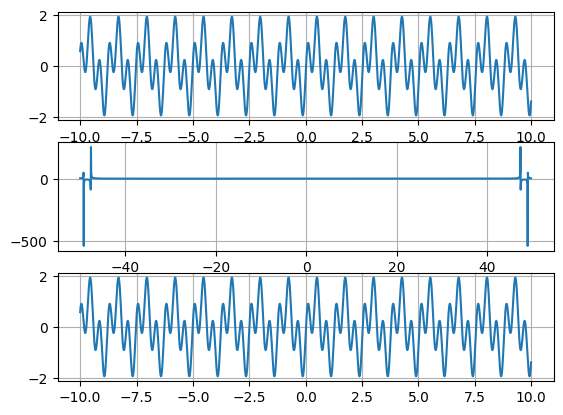

In [21]:
plt.subplot(3,1,1)
plt.plot(x,data)
plt.grid()

tic = time.perf_counter() 
plt.subplot(3,1,2)
plt.plot(w,DFT(data))
plt.grid()
toc = time.perf_counter() 

plt.subplot(3,1,3)
plt.plot(x,rev_DFT(DFT(data)))
plt.grid()


print(f"Вычисление заняло {toc - tic:0.3f} секунд")

TypeError: slice indices must be integers or None or have an __index__ method

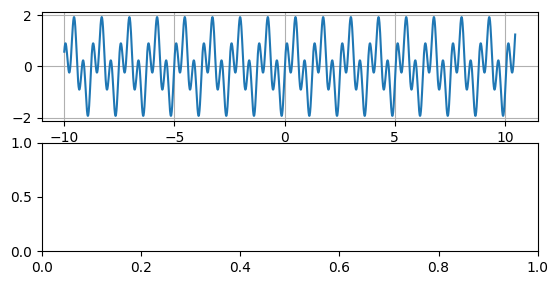

In [26]:
plt.subplot(3,1,1)
plt.plot(x,data)
plt.grid()

tic = time.perf_counter() 
plt.subplot(3,1,2)
plt.plot(w,FFT(data))   #не работает
plt.grid()

toc = time.perf_counter() 

print(f"Вычисление заняло {toc - tic:0.3f} "секунд)